In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
D = 25e-3 # m
L = 1.65 # m
mu = 8.9e-4 # Pa*s
rho = 1000 # kg/m^3
g = 9.81 # m/s^2

H_corr = (6.38 - 4.28) * 1e-3 # m

# Experimental data

In [3]:
H1 = np.array([5.15, 4.75, 3.32, 4.44, 5.74, 4.58, 5.38, 4.68, 7.36]) * 1e-3 # m
H2 = np.array([3.18, 4.48, 3.44, 4.86, 7.36, 8.34,10.68, 17.25, 28.52]) * 1e-3 # m

vol = np.array([0.000353, 0.000767, 0.00118, 0.00148, 0.00212, 0.00248, 0.00365, 0.00528, 0.00775]) # m^3
t = np.array([53.73, 34.25, 32.96, 35.14, 34.75, 38.26, 32.75, 33.45, 36.15]) # s

In [4]:
Q = vol / t
print(f'Volumetric flow rate: {Q} m^3/s')

area = math.pi * D**2 / 4
V = Q / area
print(f'Velocity: {V} /s')


Volumetric flow rate: [6.56988647e-06 2.23941606e-05 3.58009709e-05 4.21172453e-05
 6.10071942e-05 6.48196550e-05 1.11450382e-04 1.57847534e-04
 2.14384509e-04] m^3/s
Velocity: [0.01338406 0.04562101 0.07293314 0.08580055 0.12428284 0.13204952
 0.22704485 0.32156435 0.43674054] m/s


In [5]:
N_Re = rho * V * D / mu
print(f"Reynold's number: {N_Re}")

Reynold's number: [  375.95682055  1281.48902592  2048.68367894  2410.12774099
  3491.09088654  3709.25609043  6377.66441483  9032.70660043
 12267.99256742]


In [6]:
H_2_corr = H2 + H_corr
delta_H_corr = H_2_corr - H1
print(f'delta H: {delta_H_corr}')

delta_P = rho * g * delta_H_corr
print(f'delta P: {delta_P}')

delta H: [0.00013 0.00183 0.00222 0.00252 0.00372 0.00586 0.0074  0.01467 0.02326]
delta P: [  1.2753  17.9523  21.7782  24.7212  36.4932  57.4866  72.594  143.9127
 228.1806]


In [7]:
f_exp = delta_P * D / (2 * rho * L * V**2)
print(f'f (Experimental): {f_exp}')

f (Experimental): [0.05393398 0.06534561 0.03101689 0.02543991 0.01789846 0.02497578
 0.0106685  0.01054361 0.0090627 ]


In [8]:
f_calc = []

for Re in N_Re:
    if Re <= 2100:
        f = 16 / Re
        f_calc.append(f)
    else:
        f = 0.0014 + 0.125 * Re**(-0.32)
        f_calc.append(f)

print(f'f (Calculated): {f_calc}')

f (Calculated): [0.04255807881497671, 0.012485475627516408, 0.007809892842158002, 0.011743254083280218, 0.010586761534283576, 0.010410278837055937, 0.008975621722908453, 0.00817716850341045, 0.007544725570930351]


In [9]:
V_calc_sq = delta_P * D / (2.0 * rho * L)
V_calc_sq /= f_calc
V_calc = np.sqrt(V_calc_sq)

print(f'Velocity calculated: {V_calc}')
print(f'Velocity square calculated: {V_calc**2}')

Q_calc = V_calc * area
print(f'Flow rate calculated: {Q_calc}')

Velocity calculated: [0.01506705 0.10436876 0.14534547 0.12628553 0.16159854 0.20453384
 0.24753187 0.36514144 0.47866389]
Velocity square calculated: [2.27015972e-04 1.08928387e-02 2.11253044e-02 1.59480342e-02
 2.61140893e-02 4.18340904e-02 6.12720280e-02 1.33328270e-01
 2.29119123e-01]
Flow rate calculated: [7.39602049e-06 5.12318969e-05 7.13462886e-05 6.19902629e-05
 7.93244996e-05 1.00400312e-04 1.21506924e-04 1.79238384e-04
 2.34963590e-04]


slope of best fit line [9.14838243e-07]


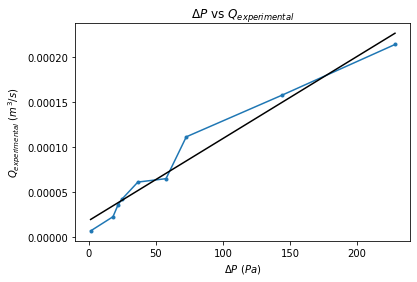

In [10]:
plt.title('$\Delta P$ vs $Q_{experimental}$')
plt.xlabel('$\Delta P\ (Pa)$')
plt.ylabel('$Q_{experimental}\ (m^3 / s)$')
plt.plot(delta_P, Q, '.-')

# Linear regression
reg = LinearRegression().fit(delta_P.reshape(-1, 1), Q)
Q_pred = reg.predict(delta_P.reshape(-1, 1))
plt.plot(delta_P, Q_pred, '-k')
print(f"slope of best fit line", reg.coef_)

plt.show()

slope of best fit line [0.97641142]


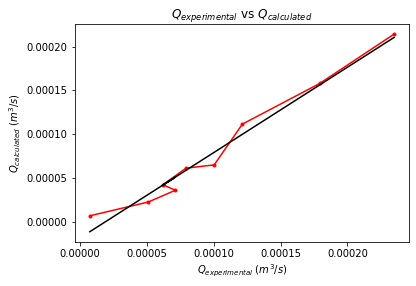

In [11]:
plt.title('$Q_{experimental}$ vs $Q_{calculated}$')
plt.xlabel('$Q_{experimental}\ (m^3 / s)$')
plt.ylabel('$Q_{calculated}\ (m^3 / s)$')
plt.plot(Q_calc, Q, '.-r')

# Linear regression
reg = LinearRegression().fit(Q_calc.reshape(-1, 1), Q)
Q_pred = reg.predict(Q_calc.reshape(-1, 1))
plt.plot(Q_calc, Q_pred, '-k')
print(f"slope of best fit line", reg.coef_)

plt.show()

# Error analysis


In [12]:
error_delta_H = (0.01 + 0.01) / (delta_H_corr * 1e3) # height (1 m -> 1e3 mm)
print('Error in delta H (%):', 100 * error_delta_H)

error_vol = 10 / (vol * 1e6) # vol (1 m^3 -> 1e6 ml)
print('Error in volume (%):', 100 * error_vol)


error_t = 0.01 / t
print('Error in time (%):', 100 * error_t)

error_delta_P = error_delta_H
print('Error in pressure difference (%):', 100 * error_delta_P)

error_Q = error_vol + error_t
print('Error in volumetric flow rate (%):', 100 * error_Q)

error_N_Re = error_Q
print('Error in Reynolds Number (%):', 100 * error_N_Re)

error_f = error_delta_P + 2 * error_Q
print('Error in f (%):', 100 * error_f)

Error in delta H (%): [15.38461538  1.09289617  0.9009009   0.79365079  0.53763441  0.34129693
  0.27027027  0.13633265  0.08598452]
Error in volume (%): [2.83286119 1.30378096 0.84745763 0.67567568 0.47169811 0.40322581
 0.2739726  0.18939394 0.12903226]
Error in time (%): [0.01861158 0.02919708 0.03033981 0.0284576  0.02877698 0.02613696
 0.03053435 0.02989537 0.02766252]
Error in pressure difference (%): [15.38461538  1.09289617  0.9009009   0.79365079  0.53763441  0.34129693
  0.27027027  0.13633265  0.08598452]
Error in volumetric flow rate (%): [2.85147277 1.33297805 0.87779743 0.70413327 0.50047509 0.42936276
 0.30450695 0.21928931 0.15669478]
Error in Reynolds Number (%): [2.85147277 1.33297805 0.87779743 0.70413327 0.50047509 0.42936276
 0.30450695 0.21928931 0.15669478]
Error in f (%): [21.08756092  3.75885227  2.65649577  2.20191734  1.53858459  1.20002246
  0.87928418  0.57491126  0.39937407]
